In [40]:
import pandas as pd
import yfinance as yf
from datetime import date , timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [3]:
start_date = '2023-12-9'
end_date = '2024-12-9'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2023-12-9  End Date: 2024-12-9


In [20]:
ticker = 'TSLA'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-12-11,239.740005,239.740005,243.440002,237.449997,242.740005,97913900
2023-12-12,237.009995,237.009995,238.990005,233.869995,238.550003,95328300
2023-12-13,239.289993,239.289993,240.300003,228.199997,234.190002,146286300
2023-12-14,251.050003,251.050003,253.880005,240.789993,241.220001,160829200
2023-12-15,253.500000,253.500000,254.130005,248.300003,251.210007,135720800
...,...,...,...,...,...,...
2024-12-02,357.089996,357.089996,360.000000,351.149994,352.380005,77986500
2024-12-03,351.420013,351.420013,355.690002,348.200012,351.799988,58267200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-12-11 to 2024-12-06
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  250 non-null    float64
 1   (Close, TSLA)      250 non-null    float64
 2   (High, TSLA)       250 non-null    float64
 3   (Low, TSLA)        250 non-null    float64
 4   (Open, TSLA)       250 non-null    float64
 5   (Volume, TSLA)     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [6]:
df.insert(0,'Date',0,)

In [7]:
df.isnull().sum()

Price      Ticker
Date                 0
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

In [8]:
df.duplicated().sum()

0

<Axes: xlabel='Date'>

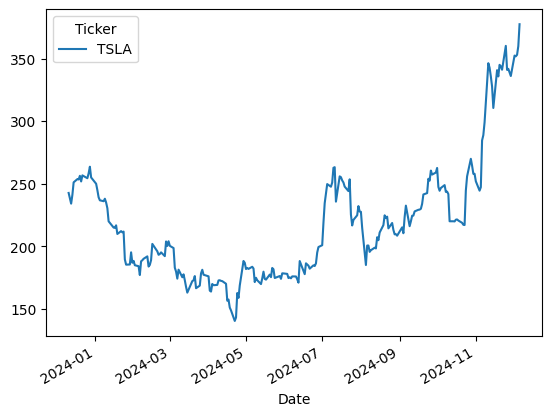

In [9]:
df['Open'].plot()

<Axes: xlabel='Date'>

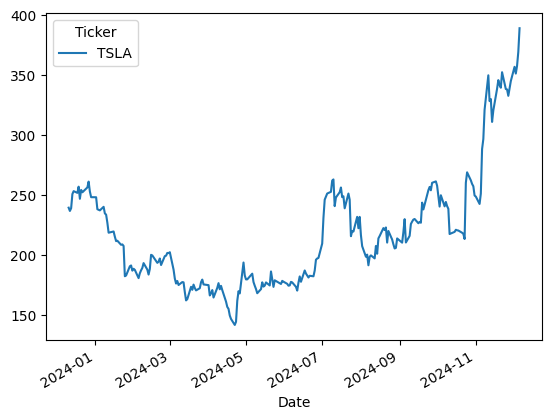

In [10]:
df['Close'].plot()

In [84]:
df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
df.head(14)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2023-12-11,239.740005,239.740005,243.440002,237.449997,242.740005,97913900,239.740005
2023-12-12,237.009995,237.009995,238.990005,233.869995,238.550003,95328300,238.375000
2023-12-13,239.289993,239.289993,240.300003,228.199997,234.190002,146286300,238.679998
2023-12-14,251.050003,251.050003,253.880005,240.789993,241.220001,160829200,241.772499
2023-12-15,253.500000,253.500000,254.130005,248.300003,251.210007,135720800,244.117999
2023-12-18,252.080002,252.080002,258.739990,251.360001,253.779999,116416500,245.445000
2023-12-19,257.220001,257.220001,258.339996,253.009995,253.479996,106737400,247.127143
2023-12-20,247.139999,247.139999,259.839996,247.000000,256.410004,125097000,247.128750


<Axes: xlabel='Date'>

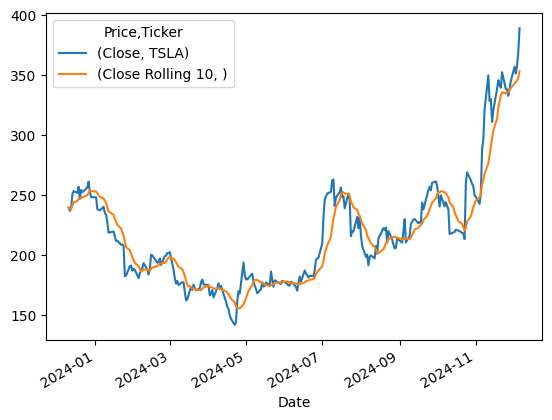

In [74]:
df[['Close','Close Rolling 10']].plot()

In [85]:
df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()

In [86]:
df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2023-12-11,239.740005,239.740005,243.440002,237.449997,242.740005,97913900,239.740005,239.740005,239.740005
2023-12-12,237.009995,237.009995,238.990005,233.869995,238.550003,95328300,238.375000,238.375000,238.375000
2023-12-13,239.289993,239.289993,240.300003,228.199997,234.190002,146286300,238.679998,238.679998,238.679998
2023-12-14,251.050003,251.050003,253.880005,240.789993,241.220001,160829200,241.772499,241.772499,241.772499
2023-12-15,253.500000,253.500000,254.130005,248.300003,251.210007,135720800,244.117999,244.117999,244.117999
...,...,...,...,...,...,...,...,...,...
2024-12-02,357.089996,357.089996,360.000000,351.149994,352.380005,77986500,343.093002,297.701667,275.020600
2024-12-03,351.420013,351.420013,355.690002,348.200012,351.799988,58267200,344.361005,302.120667,277.049001


In [13]:
df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()

KeyError: "['Close Rolling 10' 'Close Rolling 30' 'Close Rolling 50'] not in index"

In [12]:
#cummulative MOving average
df['CMA']=df['Close'].expanding().mean()
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,CMA
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,,
2023-12-11,0,239.740005,239.740005,243.440002,237.449997,242.740005,97913900,239.740005
2023-12-12,0,237.009995,237.009995,238.990005,233.869995,238.550003,95328300,238.375000
2023-12-13,0,239.289993,239.289993,240.300003,228.199997,234.190002,146286300,238.679998
2023-12-14,0,251.050003,251.050003,253.880005,240.789993,241.220001,160829200,241.772499
2023-12-15,0,253.500000,253.500000,254.130005,248.300003,251.210007,135720800,244.117999
...,...,...,...,...,...,...,...,...
2024-12-02,0,357.089996,357.089996,360.000000,351.149994,352.380005,77986500,216.425407
2024-12-03,0,351.420013,351.420013,355.690002,348.200012,351.799988,58267200,216.971944


<Axes: xlabel='Date'>

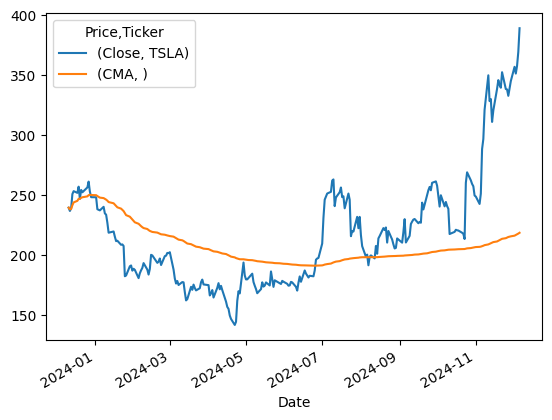

In [96]:
df[['Close','CMA']].plot()

In [16]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_test(df['Close'])

ADF Statistics: 0.7177756488433116
p- value: 0.9901860182360043
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,First Difference
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2023-12-11,239.740005,239.740005,243.440002,237.449997,242.740005,97913900,NaN
2023-12-12,237.009995,237.009995,238.990005,233.869995,238.550003,95328300,-2.730011
2023-12-13,239.289993,239.289993,240.300003,228.199997,234.190002,146286300,2.279999
2023-12-14,251.050003,251.050003,253.880005,240.789993,241.220001,160829200,11.760010
2023-12-15,253.500000,253.500000,254.130005,248.300003,251.210007,135720800,2.449997


In [25]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -15.247952394975762
p- value: 5.055773648701221e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

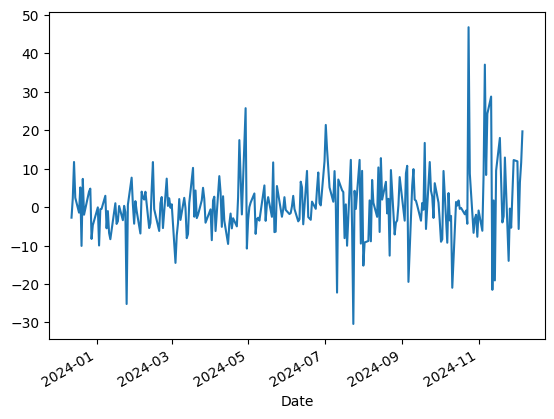

In [26]:
df['First Difference'].dropna().plot()

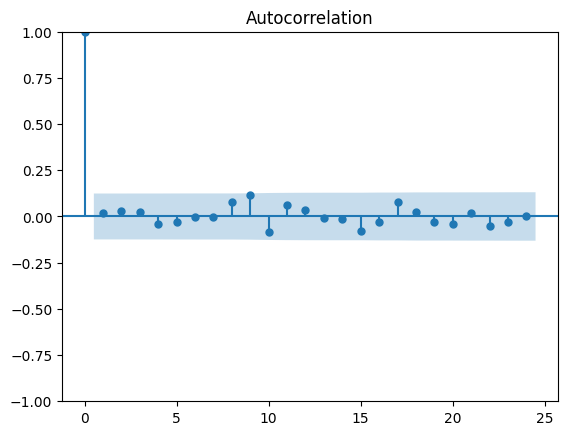

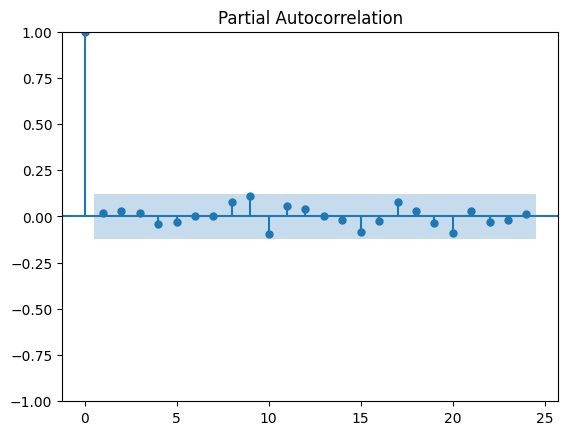

In [27]:
acf = plot_acf(df["First Difference"].dropna())
pacf = plot_pacf(df["First Difference"].dropna())

In [30]:
step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Prog

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1952.527, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1881.479, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1950.540, Time=0.02 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Prog

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1854.726, Time=0.31 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1846.971, Time=0.21 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1841.346, Time=0.90 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1835.291, Time=0.25 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.79 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1833.329, Time=0.12 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1839.376, Time=0.30 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1799.809, Time=1.00 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1798.346, Time=0.69 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1797.043, Time=0.21 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1795.072, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1793.138, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1791.145, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1793.139, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1879.505, Time=0.00 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Prog

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1793.722, Time=0.55 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 11.316 seconds


In [36]:
model_ARIMA=ARIMA(df['Close'],order=(0,1,0))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TSLA   No. Observations:                  250
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -895.551
Date:                Sat, 14 Dec 2024   AIC                           1793.102
Time:                        13:57:26   BIC                           1796.619
Sample:                             0   HQIC                          1794.517
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        77.8970      3.782     20.595      0.000      70.484      85.310
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               249.16
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               3.90   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

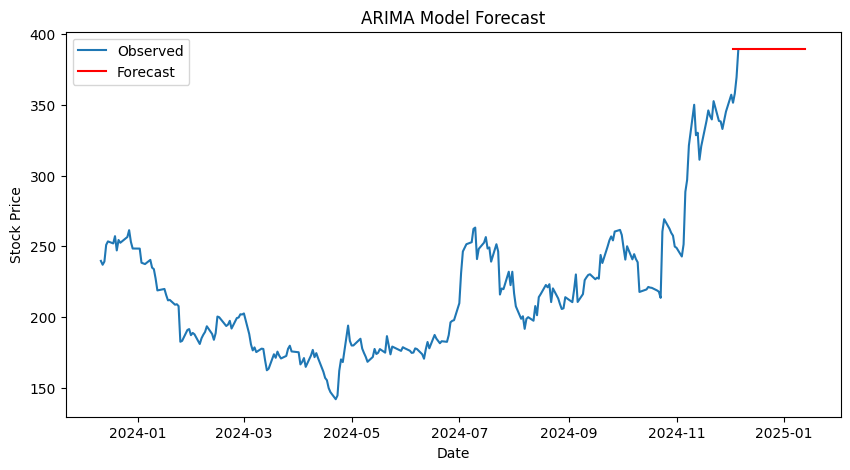

In [42]:
forecast_steps = 30
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=df.index[-5] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()